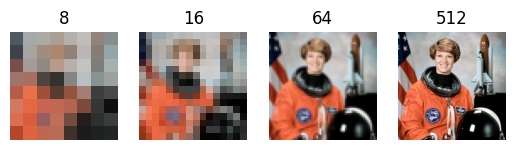

In [3]:
import torchvision.transforms.functional as F
from torchvision.io import read_image

res_hi = 512
res_mid = 64
res_lo = 16
res_ultra_lo = 8

im = read_image('../data/collins.png')

resolutions = [res_ultra_lo, res_lo, res_mid, res_hi]

fig, axs = plt.subplots(1, len(resolutions))
for i in range(len(resolutions)):
    resized = F.resize(im, resolutions[i], antialias=True)
    axs[i].set_title(resolutions[i])
    axs[i].imshow(resized.permute(1, 2, 0))
    axs[i].axis('off')

In [5]:
def hist(series: dict[str, np.ndarray], title, n_bins=10):
    min_total = 1e100
    max_total = -1e100

    for s in series.values():
        min_series = min(s)
        max_series = max(s)

        if min_series < min_total:
            min_total = min_series

        if max_series > min_total:
            max_total = max_series

    bin_edges = np.linspace(min_total, max_total, n_bins)  # Define bins explicitly here

    for name, s in series.items():
        plt.hist(s, label=name, bins=bin_edges)

    plt.legend()
    plt.show()

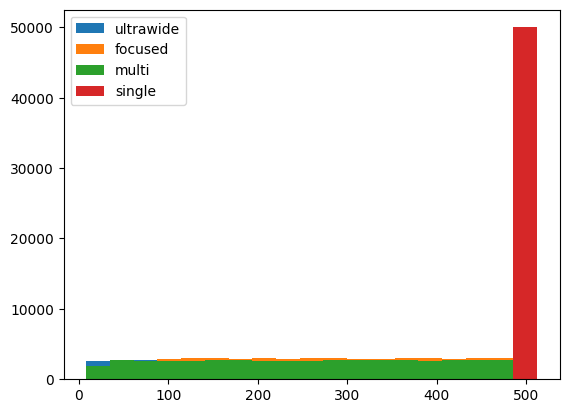

In [6]:
hist(resolutions, 'resolutions', n_bins=20)

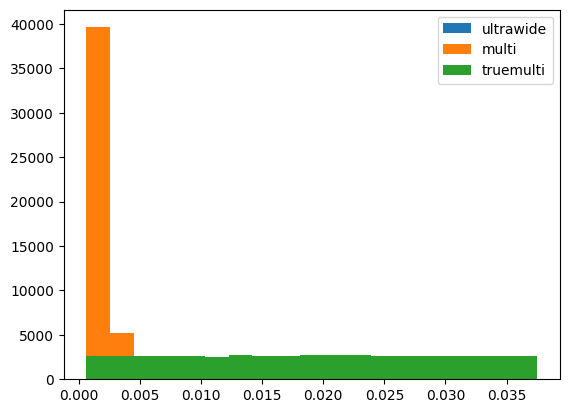

In [7]:
scales['truemulti'] = np.random.uniform(res_to_scale(res_hi), res_to_scale(res_ultra_lo), size=n_gaussians)

scales_filtered = {k: v for k, v in scales.items() if k in ['multi', 'ultrawide', 'truemulti']}

hist(scales_filtered, 'scales', n_bins=20)

(0.0, 1.0, 1.0, 0.0)

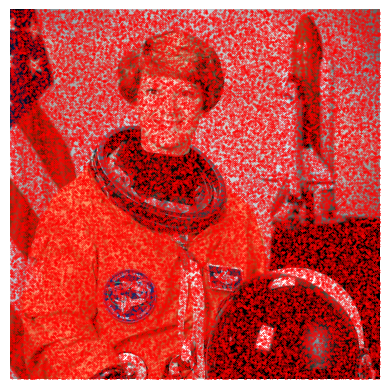

In [8]:
means = np.random.uniform(0, 1, size=(n_gaussians, 2))

plt.imshow(im.permute(1, 2, 0), extent=[0, 1, 1, 0])
plt.scatter(means[:, 0], means[:, 1], s=0.1, c='red')
plt.axis('off')

In [9]:
def gaussians_iso(means, scales):
    return [Gaussian2D(0, np.array([scale, scale]), mu) for mu, scale in zip(means, scales)]

gaussians = {label: gaussians_iso(means, scales) for label, scales in scales.items()}

In [12]:
from pipeline.multiscale_data import generate_multiscale_image_dataset

# generate_multiscale_image_dataset('collins:latest', 'collins-truemulti', gaussians['truemulti'])
generate_multiscale_image_dataset('collins:latest', 'collins-multi', gaussians['multi'])
# generate_multiscale_image_dataset('collins:latest', 'collins-single', gaussians['single'])


wandb: Currently logged in as: romeu. Use `wandb login --relogin` to force relogin


wandb:   1 of 1 files downloaded.  


  0%|          | 0/50000 [00:00<?, ?it/s]